#                                <u>Avocado Price Prediction through Machine Learning</u>

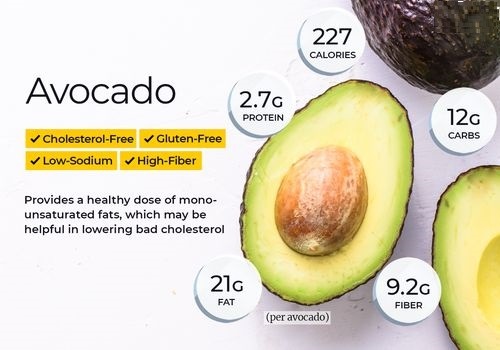

# Table of Content

1. [Problem Statement](#Section1)<br>
2. [Dataset Loading and it's Description](#Section2)<br>
   2.1 [Importing Packages](#Section201)<br>
   2.2 [Importing Dataset](#Section202)<br>
3. [ Data Pre-processing and Cleaning](#Section3)<br>
4. [Exploratory Data Analysis](#Section4)<br>
   4.1 [EDA Conclusions](#Section401)<br>
5. [Feature engineering for model building](#Section5)<br>
6. [Splitting X and y into training and test datasets.](#Section6)<br>
7. [Data Scaling](#Section7)<br>
8. [Linear Regression Model](#Section8)<br>
9. [Decision Tree](#Section9)<br>
     9.1 [Decision Tree Model 1](#Section901)<br>
     9.2 [Decision Tree Model 2](#Section902)<br>
     9.3 [Decision Tree Model 3 (with Grid Search CV)](#Section903)<br>
10. [Random Forest Model](#Section10)<br>
     10.1 [Random Forest Model 1](#Section1001)<br>
     10.2 [Random Forest Model 2](#Section1002)<br>
     10.3 [Random Forest Model 3 (with Grid Search CV)](#Section1003)<br>  
11. [Model Evaluation Results](#Section11)<br>
12. [Conclusions](#Section12)<br>

# 1. Problem Statement

- Avacard-corp avocados are sourced from over 1000 growers owning over 65,000 acres across California, Mexico, Chile, and Peru.

- With generations of experience growing, packing, and shipping avocados, they have a deep understanding of the avocado industry.

- Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.

- They want to increase their supply throughout the United States and need to make sure that they are selling their products at the best possible price.

- Avocado prices have rocketed in recent years by up to 129%, with the average national price in the US of a single Hass avocado reaching $2.10 in 2019, almost doubling in just one year.

- Due to this uncertainty in the prices, the company is not able to sell their produce at the optimal price.

- Task is to predict the optimal price of the avocado using the previous sales data of avocado according to different regions.



# 2. Dataset Loading and it's Description

## 2.1 Importing Packages

In [90]:
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

## 2.2. Importing Dataset

In [91]:
av_df= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv",index_col=0)
print('Data Shape:',av_df.shape)   ## display no of rows and columns
av_df.head()                       ## display 5 line items

Data Shape: (18249, 13)


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


The dataset contains weekly retail scan data for National Retail Volume (units) and price.

Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

The column AveragePrice is the average price of a single avocado.

This is the data that we have to predict for future samples.

|Column Name	          |Description
|-------------------------|--------------------------------------
|Date	                  |The date of the observation.
|AveragePrice	          |The average price of a single avocado.
|Total Volume	          |Total number of avocados sold.
|4046	                  |Total number of avocados with PLU 4046 sold.
|4225	                  |Total number of avocados with PLU 4225 sold.
|4770	                  |Total number of avocados with PLU 4770 sold.
|Total Bags	              |Total number of bags sold.
|Small Bags	              |Total number of small bags sold.
|Large Bags	              |Total number of large bags sold.
|XLarge Bags	          |Total number of extra-large bags sold.
|type	                  |Type of an avocado (conventional or organic).
|year	                  |The year of observation.
|Region	                  |The city or region of the observation.

In [92]:
av_df.describe()   ## dispaly statistics of columns

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [93]:
av_df.columns  # This will print the names of all columns.

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [94]:
av_df.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


- Well as a first observation we can see that we dont have any missing values (__18249__ complete data) and __13 columns__. Now let's do some Feature Engineering on the Date Feature in __pre-processing__ later so we can be able to use the day and the month columns in building our machine learning model later. ( I didn't mention the year because its already there in data frame)

In [95]:
av_df.isnull().sum()  # Will show you null count for each column, but will not count Zeros(0) as null

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- We can see that __no missing values__ exist in dataset.

In [96]:
profile = pandas_profiling.ProfileReport(av_df)
profile.to_file(output_file="Avocado_before_preprocessing.html")

- Pandas Profiling done before preprocessing dataset, so we can get initial observations from the dataset in better visual aspects, to find correlation matrix and sample data. File was saved as html file __Avocado_before_preprocessing.html__.

- Lets take a look at the file and see what useful insight can be developed from it. <br/>

# 3. Data Pre-processing and Cleaning

- Earlier in __info__ we have seen that __Date__ is __Object__ type not the date type. We have to change its type to date type.

In [97]:
av_df['Date']=pd.to_datetime(av_df['Date'])
av_df['Month']=av_df['Date'].apply(lambda x:x.month)
av_df['Day']=av_df['Date'].apply(lambda x:x.day)

In [98]:
av_df.head()    # date converted to Month and Day columns

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29



# 4. Exploratory Data Analysis

__**Organic vs Conventional**__ : The main difference between organic and conventional food products are the chemicals involved during production and processing. The interest in organic food products has been rising steadily over the recent years with new health super fruits emerging. 

### Which type of Avocados are more in demand (Conventional or Organic)?

Text(0, 0.5, 'Type of Avocados in more demand')

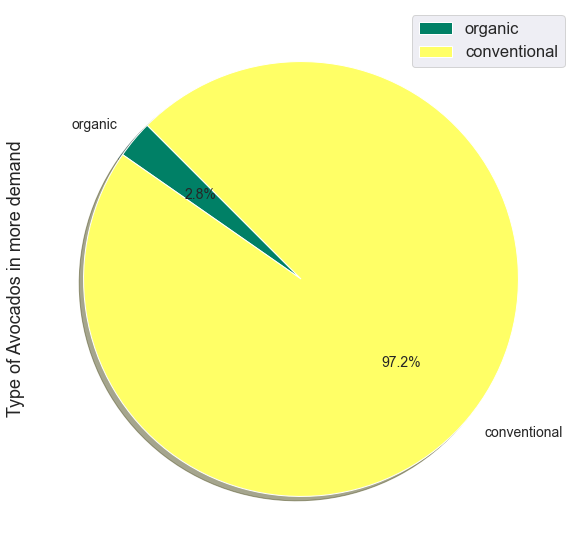

In [99]:
av_df.groupby(['type'])['Total Volume'].mean().sort_values().plot(kind='pie',fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('Type of Avocados in more demand')

- Only __2.8%__ of our dataset is organic. So looks like __Conventional is in more demand__. Now, let's look at the average price distribution

### In which range Average price lies, what is distribution look like?

<AxesSubplot:xlabel='AveragePrice'>

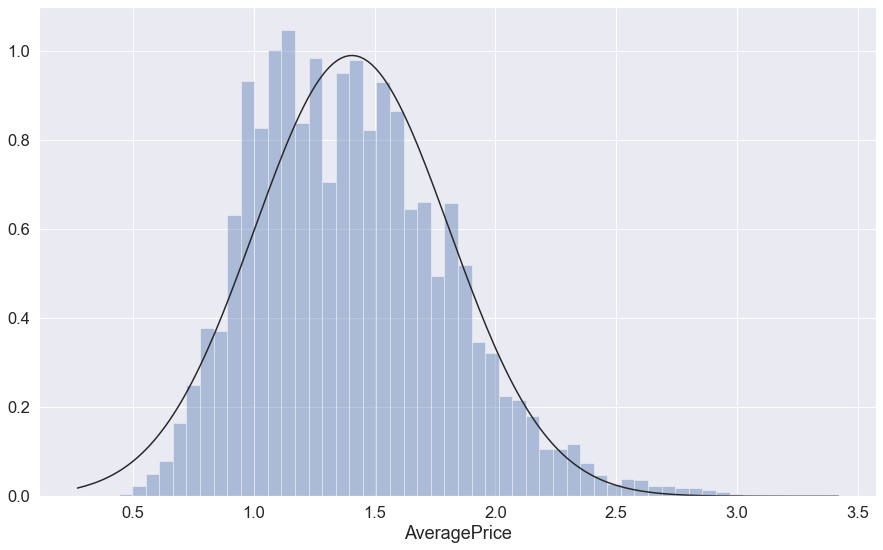

In [100]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=av_df.AveragePrice, kde=False, fit=norm)

- Average Price distribution shows that for most cases __price of avocado is between 1.1 and 1.5 dollars.__

### How Average price is distributed over the months for Conventional and Organic Types?

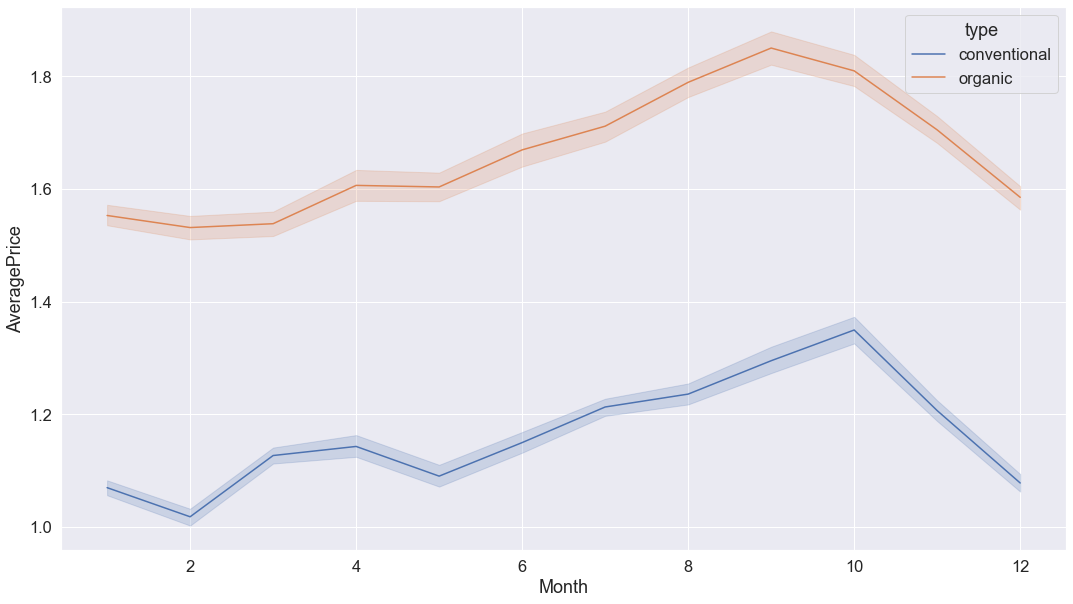

In [101]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=av_df)
plt.show()

- A __hike is visible between 8 – 10 months for both Conventional and Organic type__ of Avocados prices

### What are TOP 5 regions where Average price are very high?

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

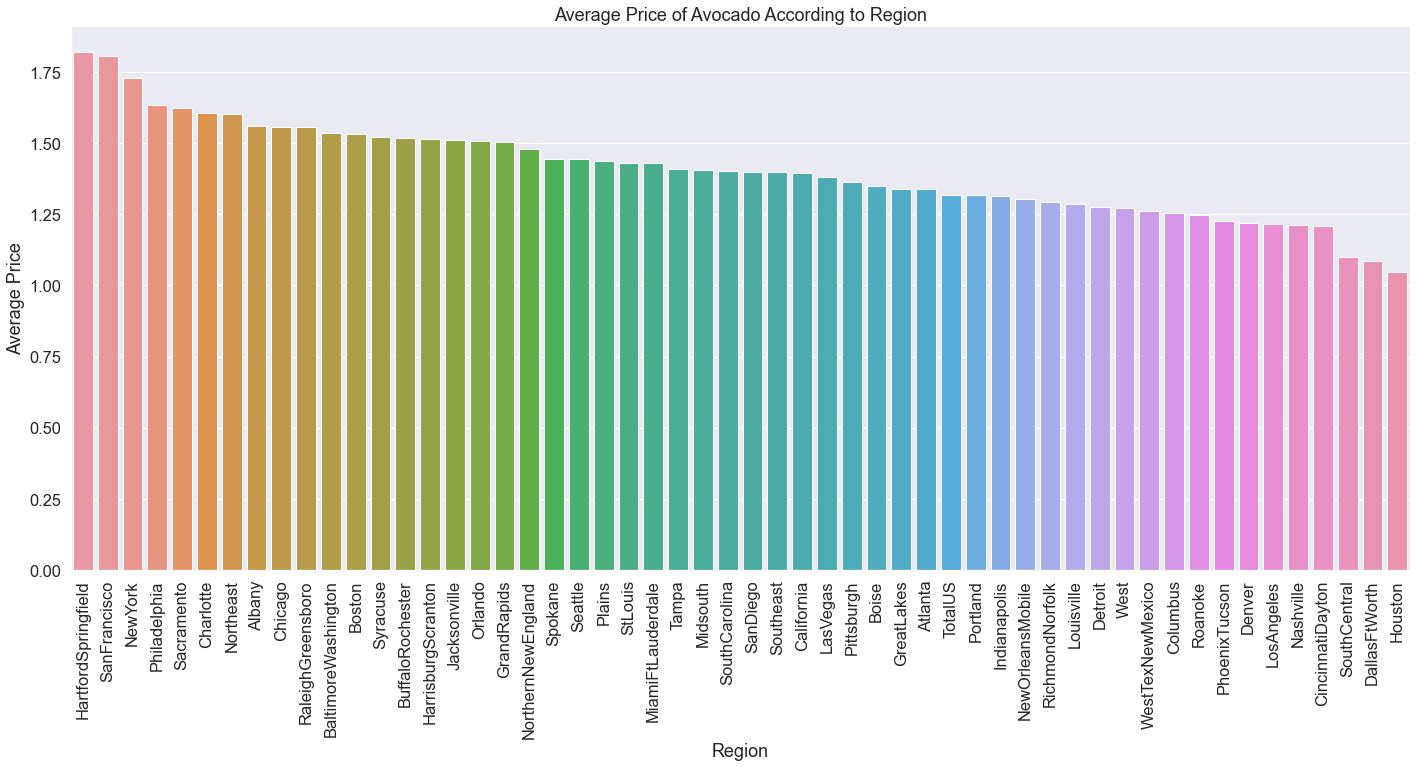

In [102]:
region_list=list(av_df.region.unique())
average_price=[]

for i in region_list:
    x=av_df[av_df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

- <ul>Prices are very high at below mentioned region: 
<ul><b><li>HartfordSpringfield</li>
<li>SanFrancisco</li>
<li>NewYork</li>
<li>Philadelphia</li>
    <li>Sacramento</li></b></ul></ul>

<a id=section12></a>

### What are TOP 5 regions where Average consumption is very high?

Text(0.5, 1.0, 'Average of Total Volume According to Region')

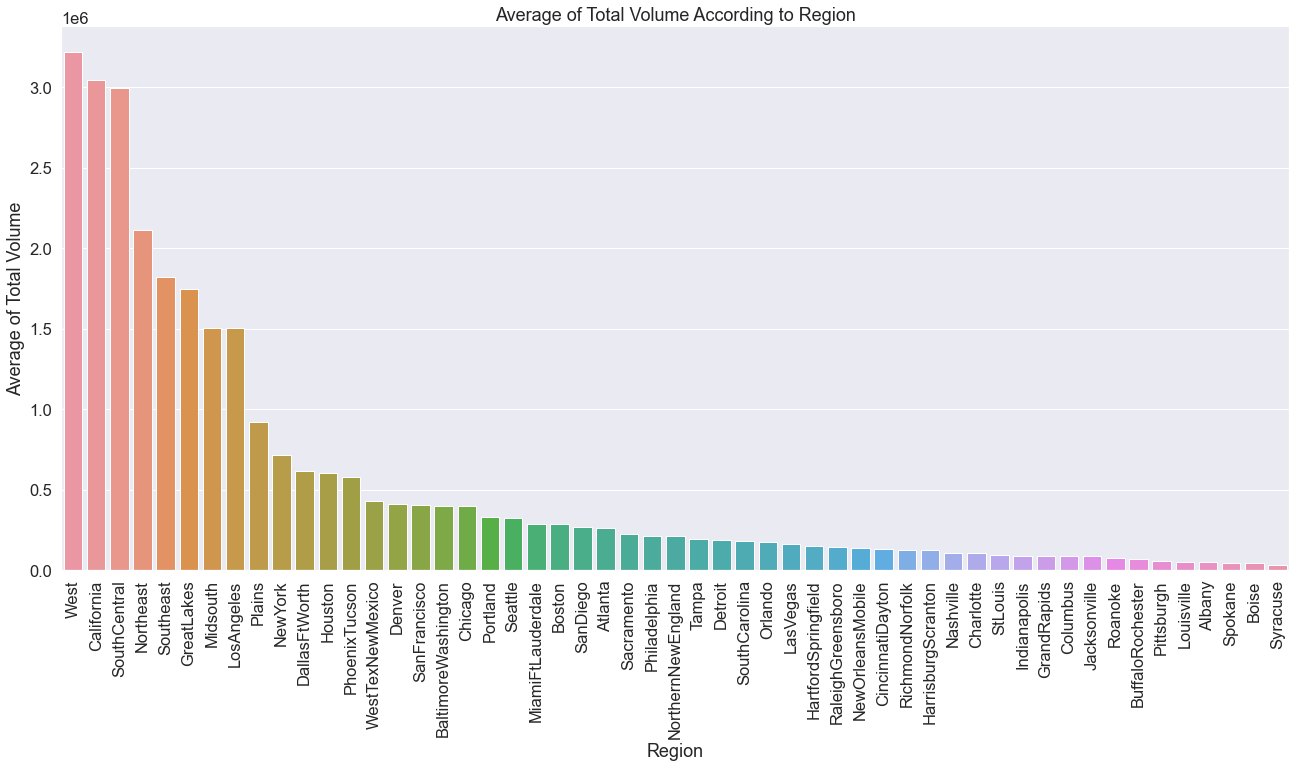

In [103]:
filter1=av_df.region!='TotalUS'
df1=av_df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

- <ul>Consumption is very high in below mentioned regions:
<ul><b><li>West</li>
<li>California</li>
<li>SouthCentral</li>
<li>Northeast</li>
    <li>Southeast</li></b></ul></ul>

### In which year and for which region was the Average price the highest?

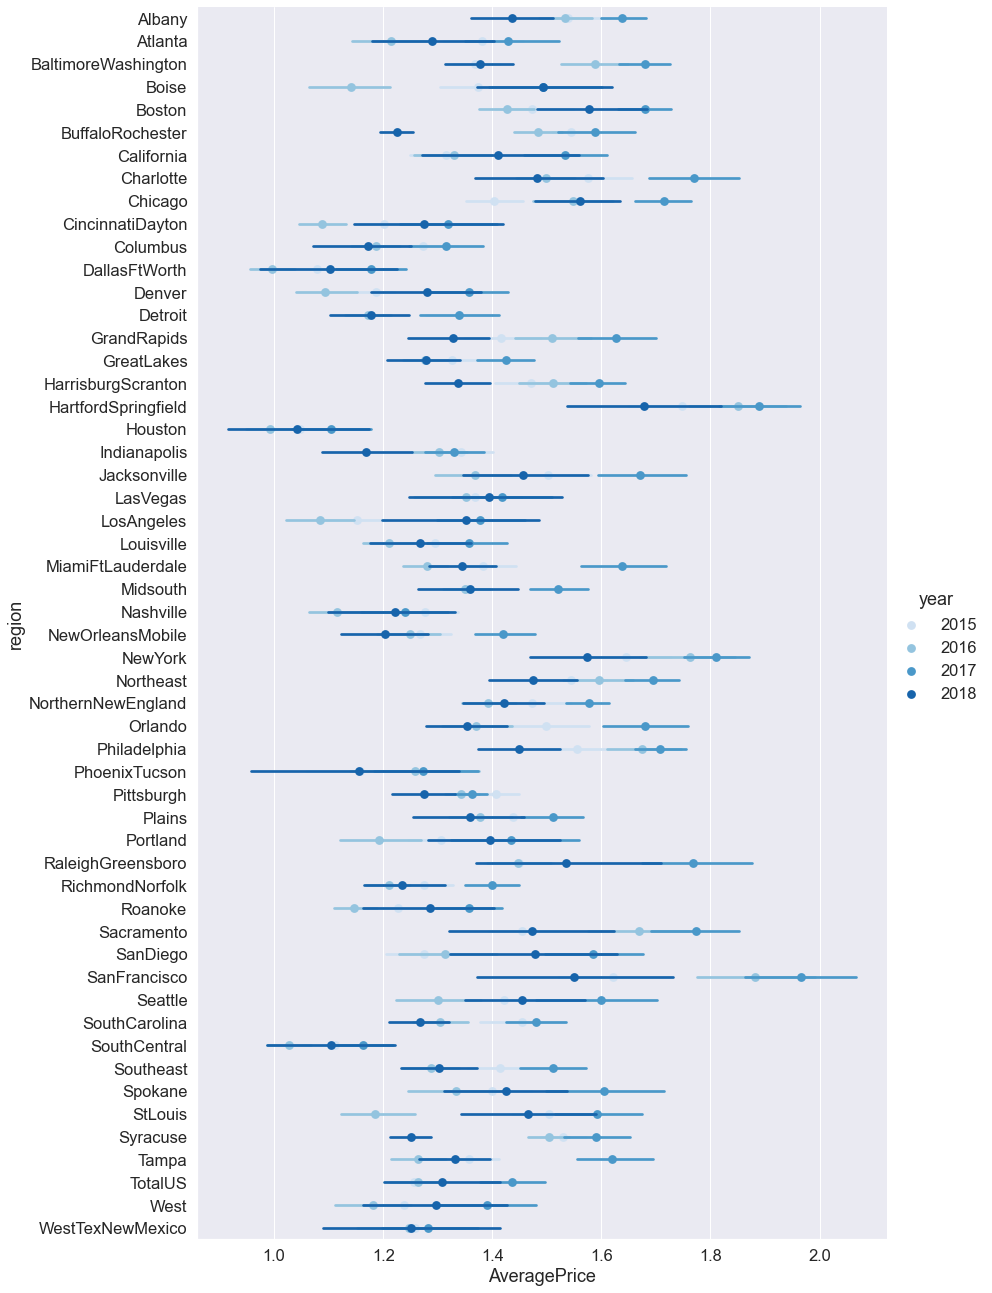

In [104]:
g = sns.factorplot('AveragePrice','region',data=av_df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

#### There was a huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region.

### How price is distributed over the date column?

Text(0.5, 1.0, 'Average Price')

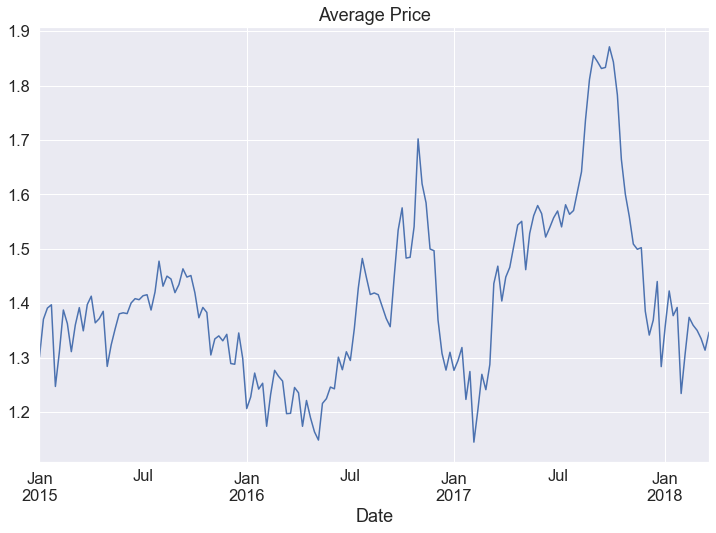

In [105]:
byDate=av_df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

- There was a huge hike in prices after __July 2017 and before Jan 2018__. 
- Lets have an idea about the relationship between our Features(Correlation)

<AxesSubplot:xlabel='type'>

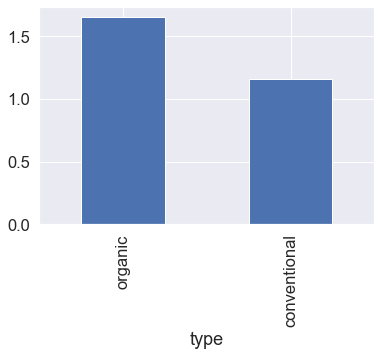

In [106]:
av_df.groupby("type").mean()['AveragePrice'].sort_values(ascending=False).plot(kind='bar')

Above bar chart shows Organic Avocados are more expensive

In [107]:
print("Total number of avocados with PLU 4046 sold: ",av_df['4046'].sum())
print("Total number of avocados with PLU 4225 sold: ",av_df['4225'].sum())
print("Total number of avocados with PLU 4770 sold: ",av_df['4770'].sum())

Total number of avocados with PLU 4046 sold:  5347110739.26
Total number of avocados with PLU 4225 sold:  5386275717.93
Total number of avocados with PLU 4770 sold:  416802342.12999994


- Avacados with PLU_Code 4770 are sold least.Sales of Avacados with PLU Code 4225 is slightly higher than PLU 4046

## How average price is distributed over year for Conventional and Organic Types?

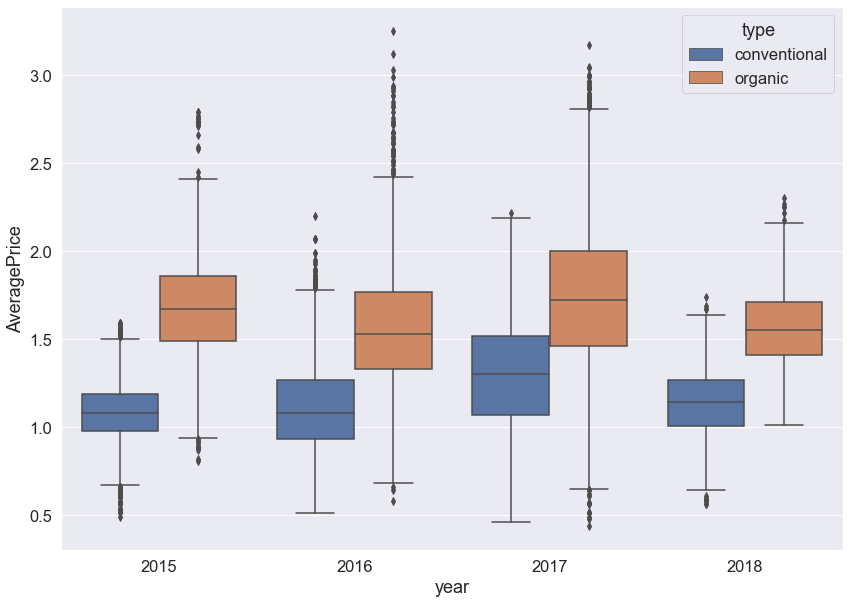

In [108]:
plt.figure(figsize=(14,10))
sns.boxplot(x="year", y="AveragePrice", hue='type', data=av_df)
plt.show()

Text(0.5, 1.0, 'year - Average price lineplot (2015 - 2018)')

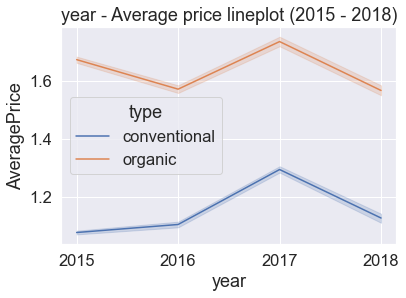

In [109]:
sns.lineplot(data=av_df, y='AveragePrice', x='year', hue='type')
plt.title("year - Average price lineplot (2015 - 2018)")

- Average prices were highest in year 2017 for both Conventional and Organic types.

### How dataset features are correlated with each other?

<AxesSubplot:>

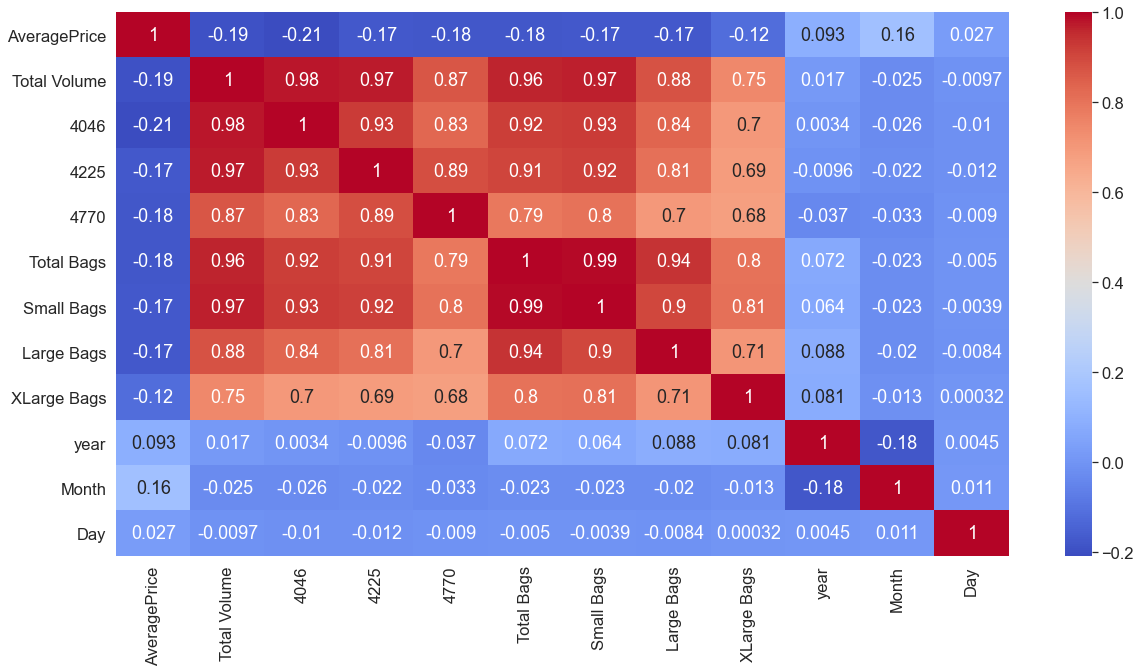

In [110]:
plt.figure(figsize=(20,10))
sns.heatmap(av_df.corr(),cmap='coolwarm',annot=True)

- As we can see from the heatmap above, all the Features are not correleted with the __Average Price column__, instead most of them are correlated with each other. 

- First we have to do some Feature Engineering on the __categorical Features : region and type__

## EDA Conclusions:
- Every year, prices of avacados are higher in Second half of year, particularly in the September-October month.Prices are increasing year by year.
- Most of the Avacados are in the price range 1.0 to 1.5.
- Hart Ford Springfield has highest average price in year 2017. Also, in San Franciso, there was a high rise in prices in year 2016-2017. 
- Organic Avacados are costlier as compared to Conventional ones. But Conventional ones are high in demand may be due to low prices.
- Sales of Avacados with Price Look up code of 4225 are higher


## Feature Engineering for Model building

In [111]:
av_df['region'].nunique()

54

In [112]:
av_df['type'].nunique()

2

- There are __54 regions__ and __2 unique types__, so it's going to be easy to to transform the __type feature__ to dummies, but for the region its going to be a bit complex, so the entire column to be dropped.

- Date Feature also to be dropped as well because __3 other columns for the Year, Month and Day__ are already available.

In [113]:
av_df_final=pd.get_dummies(av_df.drop(['region','Date'],axis=1),drop_first=True)

In [114]:
av_df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


## Model selection/predictions

- Now data is ready! lets apply our model which is going to be the __Linear Regression because our Target variable 'AveragePrice' is continuous__.
- Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and y array with the target variable.

- __Linear Regression__

# 6. Splitting X and y into training and test datasets.

In [115]:
X=av_df_final.iloc[:,1:14]
y=av_df_final['AveragePrice']
print(X.shape)
print(y.shape)

(18249, 12)
(18249,)


X has independent variables except Average price which we need to predict

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

data splitted row-wise into test and training dataset. 

# 7. Data Scaling

Scaling all X columns of to standardize the independent features present in the data in a fixed range to handle highly varying magnitudes or values or units. 


In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [118]:
X_train.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
7,5376.58,147.41,871.40,0.00,4357.77,4351.10,6.67,0.0,2017,11,12,1
50,578610.94,155537.61,153030.46,21523.37,248519.50,144796.06,103723.44,0.0,2016,1,10,0
4,6470.08,2026.07,2529.20,0.00,1914.81,1848.75,66.06,0.0,2016,11,27,1
46,145648.40,78195.76,38763.75,134.25,28554.64,25981.67,2572.97,0.0,2015,2,8,0
28,40535.05,162.25,38677.24,0.00,1695.56,1695.56,0.00,0.0,2016,6,12,1


In [119]:
X_test.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
6,218329.70,79239.58,26356.05,2998.74,109735.33,73393.34,34338.97,2003.02,2018,2,11,0
8,391514.43,228324.13,72749.38,100.62,90340.30,44449.47,45890.83,0.00,2015,11,1,0
48,3907.40,1147.09,39.51,0.00,2720.80,2717.47,3.33,0.00,2016,1,24,1
42,267953.78,150786.30,27025.48,565.65,89576.35,74664.71,14911.64,0.00,2016,3,6,0
45,8805.28,828.39,3.24,0.00,7973.65,7456.43,517.22,0.00,2017,2,19,1


In [120]:
y_train.head()

7     1.88
50    0.81
4     2.01
46    1.02
28    1.53
Name: AveragePrice, dtype: float64

In [121]:
y_test.head()

6     0.82
8     0.97
48    1.44
42    0.97
45    1.45
Name: AveragePrice, dtype: float64

# 8. Linear Regression Model

In [122]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [123]:
y_pred_train_lr =lr.predict(X_train)
print(y_pred_train_lr)
y_pred_test_lr =lr.predict(X_test)
print(y_pred_test_lr)

[1.79254214 1.0265061  1.75454861 ... 1.12371818 1.11174511 1.60527088]
[1.16389498 1.16808591 1.5508444  ... 0.98692868 1.69786667 1.71701862]


###  Model Evaluation for linear regression model

In [124]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10031438356164381
MSE: 0.021137420216438354
RMSE: 0.1453871391025986


- The __RMSE is low so we can say that we do have a good model, but lets check to be more sure__.
- Lets plot the __y_test vs the predictions__

### R- Square metric

In [125]:
from sklearn.metrics import r2_score
R2_train_lr = r2_score(y_train, y_pred_train_lr) 
R2_test_lr = r2_score(y_test, y_pred_test_lr)
print('R2 for training set is {}'.format(R2_train_lr))
print('R2 for test set is {}'.format(R2_test_lr))

R2 for training set is 0.4402140671575402
R2 for test set is 0.4330705934670045


,Y Test,Pred
6,0.82,1.163895
8,0.97,1.168086
48,1.44,1.550844
42,0.97,1.070764
45,1.45,1.618120


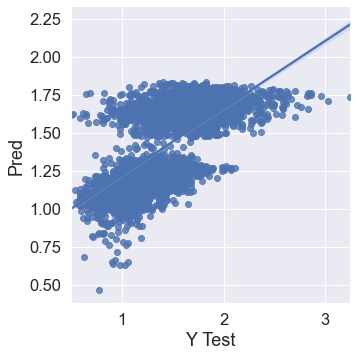

In [126]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_lr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

- As we can see that __we don't have a straight line so I am not sure that this is the best model we can apply on our data__

#### Adjusted R-Square Metric

Let us develop a Function to calculate the Adjusted R square so that we can call the function anytime during the program

def Adjusted_r2(r_square,P,N)

return(1-(((1-r_square)*(N-1))/(N-P-1))) Were r_square is the R-Square value P is the number of independent variables. In this case it is 12. N is the length of the dependent variables.


In [127]:
def Adjusted_r2(r_square,N): #creating function so that we can call the function again and again
    return(1-(((1-r_square)*(N-1))/(N-13)))

In [128]:
adj_r2_train=Adjusted_r2(R2_train_lr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_lr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.43975352751719265
The Adjusted R-square of Linear Regression Test Dataset is : 0.43120005376989257


- Lets try working with the  __Decision Tree Regression model__

## 9. Decision Tree Regression

#### 9.1 Decision Tree Model 1

In [129]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [130]:
y_pred_train_dtr=dtr.predict(X_train)
y_pred_test_dtr=dtr.predict(X_test)

,Y Test,Pred
6,0.82,0.78
8,0.97,0.99
48,1.44,1.34
42,0.97,0.94
45,1.45,1.43


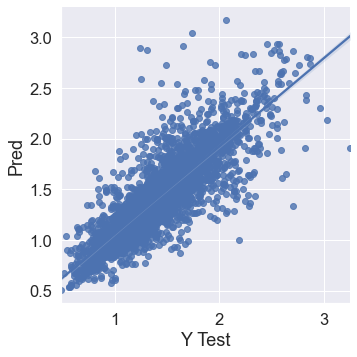

In [131]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_dtr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

- Here we can see that __we nearly have a straight line__, in other words __its better than the Linear regression model, and to be more sure lets check the RMSE__

In [132]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10031438356164381
MSE: 0.021137420216438354
RMSE: 0.1453871391025986


- __RMSE is lower than the previous one we got with Linear Regression__. Now lets try with last model to see if __predictions can be improved for this data which is the RandomForestRegressor__

#### R- Square metric

In [133]:
R2_train_dtr = r2_score(y_train, y_pred_train_dtr)
print('R2 for training set is {}'.format(R2_train_dtr))
R2_test_dtr = r2_score(y_test, y_pred_test_dtr)
print('R2 for test set is {}'.format(R2_test_dtr))

R2 for training set is 1.0
R2 for test set is 0.7113766484658774


#### Adjusted R-Square Metric

In [134]:
adj_r2_train=Adjusted_r2(R2_train_dtr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_dtr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 1.0
The Adjusted R-square of Linear Regression Test Dataset is : 0.7104243580566365


### 9.2 Decision Tree Model 2

In [135]:
dtr=DecisionTreeRegressor(criterion='mse', max_depth=7,
                               max_features=None, max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_impurity_split=None,
                               min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, presort=False,
                               random_state=None, splitter='best')
dtr.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=7, presort=False)

In [136]:
y_pred_train_dtr=dtr.predict(X_train)
y_pred_test_dtr=dtr.predict(X_test)

,Y Test,Pred
6,0.82,1.123591
8,0.97,1.067500
48,1.44,1.562500
42,0.97,0.957303
45,1.45,1.595615


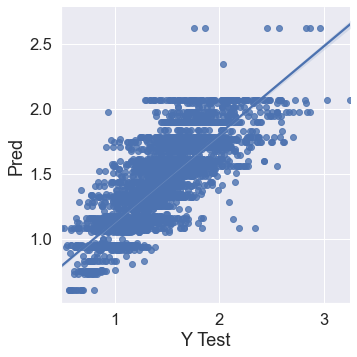

In [137]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_dtr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

## Model Evaluation for Decision Tree Model - 2

#### Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [138]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_dtr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_dtr)))

MAE: 0.17599917724111902
MSE: 0.055223996669191235
RMSE: 0.23499786524390223


#### R- Square metric

In [139]:
R2_train_dtr = r2_score(y_train, y_pred_train_dtr)
print('R2 for training set is {}'.format(R2_train_dtr))
R2_test_dtr = r2_score(y_test, y_pred_test_dtr)
print('R2 for test set is {}'.format(R2_test_dtr))

R2 for training set is 0.704582172404707
R2 for test set is 0.6562873483257807


#### Adjusted R-Square Metric

In [140]:
adj_r2_train=Adjusted_r2(R2_train_dtr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_dtr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.7043391301771502
The Adjusted R-square of Linear Regression Test Dataset is : 0.6551532950345818


## 9.3 Decision Tree Model 3 (with Grid Search CV)

In [141]:
from sklearn.model_selection import GridSearchCV

decision_tree_regressor= DecisionTreeRegressor(random_state = 0)

max_depth = list(range(2, 60))
max_depth.append('None')

tree_para = [{'max_depth': max_depth,
              'splitter' : ["best", "random"],
              'max_features': ["auto", "log2"] }]
                            
                            

grid_search = GridSearchCV(decision_tree_regressor,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                        24, 25, 26, 27, 28, 29, 30, 31, ...],
                          'max_features': ['auto', 'log2'],
                          'splitter': ['best', 'random']}],
             refit='AUC')

In [142]:
dtr = grid_search.best_estimator_

In [143]:
y_pred_train_dtr=dtr.predict(X_train)
y_pred_test_dtr=dtr.predict(X_test)

,Y Test,Pred
6,0.82,0.945217
8,0.97,0.973333
48,1.44,1.332500
42,0.97,0.912500
45,1.45,1.531361


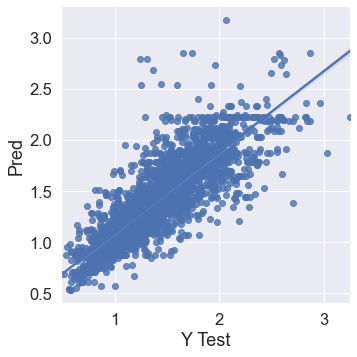

In [144]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_dtr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

## Model Evaluation for Decision Tree Model - 3

#### Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [145]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_dtr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_dtr)))

MAE: 0.1449592878785456
MSE: 0.04519974633947117
RMSE: 0.21260231969447363


#### R- Square metric

In [146]:
R2_train_dtr = r2_score(y_train, y_pred_train_dtr)
print('R2 for training set is {}'.format(R2_train_dtr))
R2_test_dtr = r2_score(y_test, y_pred_test_dtr)
print('R2 for test set is {}'.format(R2_test_dtr))

R2 for training set is 0.873110488935427
R2 for test set is 0.7186780094456853


#### Adjusted R-Square Metric

In [147]:
adj_r2_train=Adjusted_r2(R2_train_dtr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_dtr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.8730060960838724
The Adjusted R-square of Linear Regression Test Dataset is : 0.7177498093118795


## 10. Random Forest Regressor

### 10.1 Random Forest Model 1

In [148]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [149]:
y_pred_train_rdr=rdr.predict(X_train)
y_pred_test_rdr=rdr.predict(X_test)

In [150]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_rdr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_rdr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rdr)))

MAE: 0.10091276712328767
MSE: 0.021472401928767117
RMSE: 0.14653464412474995


,Y Test,Pred
6,0.82,0.9552
8,0.97,0.9881
48,1.44,1.4066
42,0.97,0.9032
45,1.45,1.4408


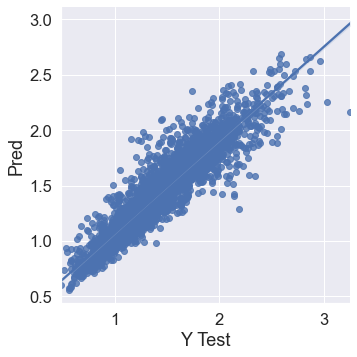

In [151]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_rdr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

#### R- Square metric

In [152]:
R2_train_rdr = r2_score(y_train, y_pred_train_rdr)
R2_test_rdr = r2_score(y_test, y_pred_test_rdr)

In [153]:
print('R2 for training set is {}'.format(R2_train_rdr))
print('R2 for test set is {}'.format(R2_test_rdr))

R2 for training set is 0.9820906946998877
R2 for test set is 0.8663563550287449


#### Adjusted R-Square Metric

In [154]:
adj_r2_train=Adjusted_r2(R2_train_rdr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_rdr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.9820759605943343
The Adjusted R-square of Linear Regression Test Dataset is : 0.8659154081660407


## 10.2 Random Forest Model 2

In [155]:
rdr = RandomForestRegressor(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)
rdr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=15, random_state=0)

In [156]:
y_pred_train_rdr=rdr.predict(X_train)
y_pred_test_rdr=rdr.predict(X_test)

### Model Evaluation for Random Forest Model - 2

#### Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [157]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_rdr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_rdr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rdr)))

MAE: 0.10525223744292236
MSE: 0.023473518417047187
RMSE: 0.153210699420919


,Y Test,Pred
6,0.82,0.877333
8,0.97,1.002667
48,1.44,1.396000
42,0.97,0.901333
45,1.45,1.476667


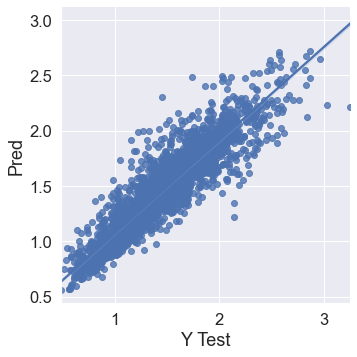

In [158]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_rdr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

#### R- Square metric

In [159]:
R2_train_rdr = r2_score(y_train, y_pred_train_rdr)
R2_test_rdr = r2_score(y_test, y_pred_test_rdr)

In [160]:
print('R2 for training set is {}'.format(R2_train_rdr))
print('R2 for test set is {}'.format(R2_test_rdr))

R2 for training set is 0.9760538899492889
R2 for test set is 0.8539014604904895


#### Adjusted R-Square Metric

In [161]:
adj_r2_train=Adjusted_r2(R2_train_rdr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_rdr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.9760341893239901
The Adjusted R-square of Linear Regression Test Dataset is : 0.8534194196672522


## 10.3 Random Forest Model 3 (with Grid search CV)

In [162]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV

max_depth = list(range(2, 30))
max_depth.append('None')

# specify parameters and distributions to sample from
param_dist = {"max_depth": max_depth,
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "n_estimators": [100, 400, 700, 1000, 1500],
              'max_features': ["auto", "log2"]
             }
# run randomized search
n_iter_search = 30
random_search = RandomizedSearchCV(rdr, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [163]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(n_estimators=15,
                                                   random_state=0),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 'None'],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C8188AA370>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C8240DA5B0>,
                                        'n_estimators': [100, 400, 700, 1000,
               

In [164]:
rdrcv = random_search.best_estimator_

In [165]:
y_pred_train_rdr=rdrcv.predict(X_train)
y_pred_test_rdr=rdrcv.predict(X_test)

## Model Evaluation for Random Forest Model - 3

#### Mean Absolute Error , Mean Squared Error and Root Mean Squared Error metrics

In [166]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test_rdr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test_rdr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_rdr)))

MAE: 0.10634159728254168
MSE: 0.023204934519911388
RMSE: 0.15233165961122916


,Y Test,Pred
6,0.82,0.967077
8,0.97,1.004453
48,1.44,1.405256
42,0.97,0.898939
45,1.45,1.450858


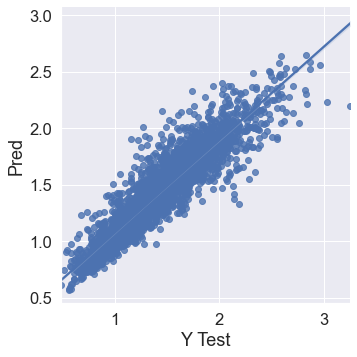

In [167]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_test_rdr},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

#### R- Square metric

In [168]:
R2_train_rdr = r2_score(y_train, y_pred_train_rdr)
R2_test_rdr = r2_score(y_test, y_pred_test_rdr)

In [169]:
print('R2 for training set is {}'.format(R2_train_rdr))
print('R2 for test set is {}'.format(R2_test_rdr))

R2 for training set is 0.9496138715769549
R2 for test set is 0.8555731193534751


#### Adjusted R-Square Metric

In [170]:
adj_r2_train=Adjusted_r2(R2_train_rdr,len(X_train))
print('The Adjusted R-square of Linear Regression Train Dataset is :', adj_r2_train)
adj_r2_test=Adjusted_r2(R2_test_rdr,len(X_test))
print('The Adjusted R-square of Linear Regression Test Dataset is :', adj_r2_test)

The Adjusted R-square of Linear Regression Train Dataset is : 0.9495724185712593
The Adjusted R-square of Linear Regression Test Dataset is : 0.8550965940392716


## 11. Model Evaluation Results

| Model                       |	MAE | MSE | RMSE | R-Sq | Adj R-Sq |
|-----------------------------|-----|-----|-----|-----|-----|
| Linear Regression	      |0.224|0.084|0.290|0.481|0.479|
| Decision Tree Model 1       |0.137|0.045|0.214|0.717|0.716|                                 
| Decision Tree Model 2       |0.173|0.052|0.228|0.679|0.677|    
| Decision Tree Model 3 (GSCV)|0.144|0.042|0.207|0.736|0.735|                              
| Random Forest Model 1       |0.102|0.021|0.147|0.8667|0.8663|                   
| Random Forest Model 2       |0.108|0.023|0.154|0.852|0.852|
| Random Forest Model 3 (GSCV)|0.102|0.021|0.147|0.8667|0.8662|                  


As per the Model Evaluation results section, it is clear that Random Forest Model 1 is giving the best Prediction Results and Random Forest Model 3 is not far behind and also giving equally good prediction results compared to other models used

## 12. Conclusions

- With the help of notebook I learnt how __EDA__ can be carried out using __Pandas and other plotting libraries__.
- Also I have seen making use of packages like __matplotlib, plotly and seaborn__ to develop better insights about the data.<br/>
- I have also seen how __preproceesing__ helps in dealing with __missing values and irregualities__ present in the data. I also learnt __how to create new features__ which will in turn help us to better predict the survival. 
- I also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- I have seen the impact of columns like __type, year/date__ on the __Average price increase/decrease rate__.
- The most important inference drawn from all this analysis is, I get to know what are the __features on which price is highly positively and negatively coorelated with.__ 
- I came to know through analysis which model will be work with better accuracy with the help of __low residual and RMSE scores__.
- This project helped me to gain insights and how I should go with flow, which model to choose first and go step by step to attain results with good accuracy. Also get to know __where to use Linear, Decision Tree and other applicable and required models to fine tune the predictions__.